In [2]:
import numpy as np

# Loading the files with the same names
x_test_e = np.load('./files/x_test_e.npy')
y_test_e = np.load('./files/y_test_e.npy')
s_test_e = np.load('./files/s_test_e.npy')
h_test_e = np.load('./files/h_test_e.npy')

x_test_v = np.load('./files/x_test_v.npy')
y_test_v = np.load('./files/y_test_v.npy')
s_test_v = np.load('./files/s_test_v.npy')
h_test_v = np.load('./files/h_test_v.npy')

# Verify loaded arrays (optional)
print(x_test_e.shape, y_test_e.shape, s_test_e.shape, h_test_e.shape)
print(x_test_v.shape, y_test_v.shape, s_test_v.shape, h_test_v.shape)



def compute_embedding_batch_two(x_test_batch, embedding_network, batch_size=100, device="cuda"):
    #print(x_test_batch.shape)
    return x_test_batch


(10000, 128) (10000,) (10000,) (10000,)
(160051, 128) (160051,) (160051,) (160051,)


Enrollment Data Shapes: (7500, 128) (7500,) (7500,) (7500,)
Verification Data Shapes: (125251, 128) (125251,) (125251,) (125251,)


In [3]:
import numpy as np

# Loading the files
x_test_e = np.load('./files/x_test_e.npy')
y_test_e = np.load('./files/y_test_e.npy')
s_test_e = np.load('./files/s_test_e.npy')
h_test_e = np.load('./files/h_test_e.npy')

x_test_v = np.load('./files/x_test_v.npy')
y_test_v = np.load('./files/y_test_v.npy')
s_test_v = np.load('./files/s_test_v.npy')
h_test_v = np.load('./files/h_test_v.npy')

# Filter out samples with hardware 'b'BioSemi''
def filter_biosemi_data(x_data, y_data, s_data, h_data, excluded_hardware=b'BioSemi'):
    valid_indices = np.where(h_data != excluded_hardware)[0]
    return x_data[valid_indices], y_data[valid_indices], s_data[valid_indices], h_data[valid_indices]

# Apply the filter
x_test_e, y_test_e, s_test_e, h_test_e = filter_biosemi_data(x_test_e, y_test_e, s_test_e, h_test_e)
x_test_v, y_test_v, s_test_v, h_test_v = filter_biosemi_data(x_test_v, y_test_v, s_test_v, h_test_v)

# Verify filtered arrays (optional)
print("Enrollment Data Shapes:", x_test_e.shape, y_test_e.shape, s_test_e.shape, h_test_e.shape)
print("Verification Data Shapes:", x_test_v.shape, y_test_v.shape, s_test_v.shape, h_test_v.shape)

# Placeholder function for embedding computation
def compute_embedding_batch_two(x_test_batch, embedding_network, batch_size=100, device="cuda"):
    # Print shape for verification (optional)
    print(x_test_batch.shape)
    return x_test_batch


array([b'Geodisi', b'Geodisi', b'Geodisi', ..., b'Geodisi', b'HydroCe',
       b'HydroCe'], dtype='|S7')

In [42]:
import numpy as np
import random
random.seed(42)
def extract_random_samples_per_subject_session(x_data, y_data, s_data, h_data, selected_subjects, samples_per_session=20,max_session=4):

    x_selected, y_selected, s_selected, h_selected = [], [], [], []

    for subject in selected_subjects:
        # Indices for the current subject
        subject_indices = np.where(y_data == subject)[0]

        # Get unique sessions for this subject
        subject_sessions = np.unique(s_data[subject_indices])
        max_s_temp=0
        for session in subject_sessions:
            max_s_temp = max_s_temp + 1
            if max_s_temp > max_session:
                continue
            # Indices for the current session of the subject
            session_indices = np.where((y_data == subject) & (s_data == session))[0]

            # Randomly select samples_per_session indices
            if len(session_indices) > samples_per_session:
                selected_indices = random.sample(list(session_indices), samples_per_session)
            else:
                selected_indices = session_indices  # Use all if less than required

            # Append the selected samples to the result
            x_selected.append(x_data[selected_indices])
            y_selected.append(y_data[selected_indices])
            s_selected.append(s_data[selected_indices])
            h_selected.append(h_data[selected_indices])

    # Concatenate lists back into numpy arrays
    x_selected = np.concatenate(x_selected, axis=0)
    y_selected = np.concatenate(y_selected, axis=0)
    s_selected = np.concatenate(s_selected, axis=0)
    h_selected = np.concatenate(h_selected, axis=0)

    return x_selected, y_selected, s_selected, h_selected


# Example Usage
# Assuming x_test_e, y_test_e, s_test_e, h_test_e are enrollment data arrays
# and x_test_v, y_test_v, s_test_v, h_test_v are verification data arrays

# Step 1: Select common subjects
num_subjects = 20  # Example: Select 5 subjects
unique_subjects = np.unique(y_test_e)
selected_subjects = random.sample(list(unique_subjects), num_subjects)

# Step 2: Filter Enrollment Data
x_enroll_filtered, y_enroll_filtered, s_enroll_filtered, h_enroll_filtered = extract_random_samples_per_subject_session(
    x_test_e, y_test_e, s_test_e, h_test_e, selected_subjects, samples_per_session=30)

# Step 3: Filter Verification Data
x_verify_filtered, y_verify_filtered, s_verify_filtered, h_verify_filtered = extract_random_samples_per_subject_session(
    x_test_v, y_test_v, s_test_v, h_test_v, selected_subjects, samples_per_session=10)

# Verify the results
print("Enrollment data shapes:", x_enroll_filtered.shape, y_enroll_filtered.shape, s_enroll_filtered.shape, h_enroll_filtered.shape)
print("Verification data shapes:", x_verify_filtered.shape, y_verify_filtered.shape, s_verify_filtered.shape, h_verify_filtered.shape)


Enrollment data shapes: (600, 128) (600,) (600,) (600,)
Verification data shapes: (800, 128) (800,) (800,) (800,)


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from matplotlib.colors import to_rgb

n1, n2 = 1000, 2

# Data and t-SNE computations, assuming definitions from earlier
XV1, YV1, S1, H1 = x_enroll_filtered, y_enroll_filtered, s_enroll_filtered, h_enroll_filtered
XV2, YV2, S2, H2 = x_verify_filtered, y_verify_filtered, s_verify_filtered, h_verify_filtered

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, metric='cosine')
X_combined = np.concatenate([XV1, XV2])
Y_combined = np.concatenate([YV1, YV2])
S_combined = np.concatenate([S1, S2])
H_combined = np.concatenate([H1, H2])
X_tsne_combined = tsne.fit_transform(X_combined)

# Split the transformed data
split_idx = XV1.shape[0]
X_tsne_1 = X_tsne_combined[:split_idx, :]
X_tsne_2 = X_tsne_combined[split_idx:, :]

unique_labels = np.unique(YV2)


In [74]:
import pickle
with open("assigned_colors2.pkl", "wb") as f:
    pickle.dump(assigned_colors2, f)
print("Assigned colors saved to 'assigned_colors2.pkl'")

Assigned colors saved to 'assigned_colors2.pkl'


In [75]:
with open("assigned_colors2.pkl", "rb") as f:
    assigned_colors2 = pickle.load(f)
print("Assigned colors loaded from 'assigned_colors2.pkl'")

Assigned colors loaded from 'assigned_colors2.pkl'


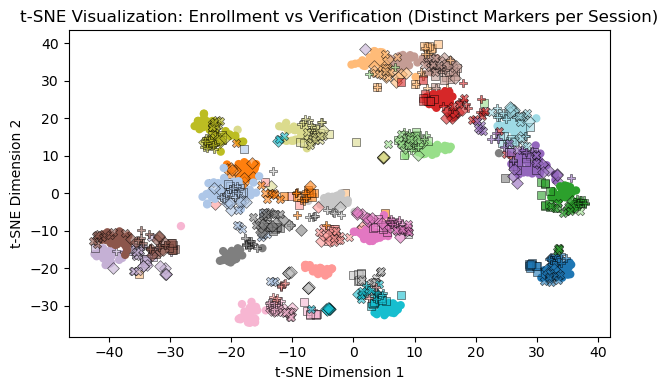

In [78]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgb
import seaborn as sns

# Figure size
plt.figure(figsize=(6.3, 4))

# Generate a color palette with enough colors for all unique labels
palette = sns.color_palette('tab20', n_colors=20)
palette = [tuple(color) for color in palette]

labels = np.unique(Y_combined)

# Shuffle the palette to randomize color assignments
#random.shuffle(palette)

# Assign shuffled colors to labels
#assigned_colors2 = {label: palette[i % len(palette)] for i, label in enumerate(labels)}

# Define marker list and shuffle for variety
marker_list = ['s', 'D', 'P', 'X', '*', 'v', '^', '<', '>']
#random.shuffle(marker_list)

# Plotting enrollment and verification points separately
for i, label in enumerate(labels):
    # Enrollment data
    idx_enroll = (Y_combined == label) & (np.arange(len(Y_combined)) < split_idx)
    points_enroll = X_tsne_combined[idx_enroll]

    # Verification data
    idx_verify = (Y_combined == label) & (np.arange(len(Y_combined)) >= split_idx)
    points_verify = X_tsne_combined[idx_verify]

    # Get unique session identifiers for verification
    session_ids = np.unique(S_combined[idx_verify])

    # Plot enrollment points with fixed marker 'o'
    plt.scatter(points_enroll[:, 0], points_enroll[:, 1],
                label=f"Enrollment: {label}", color=assigned_colors2[label],
                marker='o', alpha=1, edgecolors='none')

    # Assign unique markers for each verification session
    for session_idx, session_id in enumerate(session_ids):
        session_points = points_verify[S_combined[idx_verify] == session_id]
        marker = marker_list[session_idx % len(marker_list)]  # Cycle through marker list
        plt.scatter(session_points[:, 0], session_points[:, 1],
                    label=f"Verification: {label} (Session {session_idx + 1})",
                    color=assigned_colors2[label], marker=marker,
                    alpha=0.6, edgecolors='k', linewidth=0.5)

# Custom legend and plot adjustments
plt.title("t-SNE Visualization: Enrollment vs Verification (Distinct Markers per Session)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.tight_layout()
plt.savefig('subjects_20.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [79]:
np.unique(Y_combined)

array([ 82,  86,  96, 119, 125, 129, 130, 145, 184, 192, 194, 201, 207,
       230, 260, 299, 301, 314, 322, 325])

/tmp/ipykernel_1325818/1457755951.py:58: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(points_verify[:, 0], points_verify[:, 1],


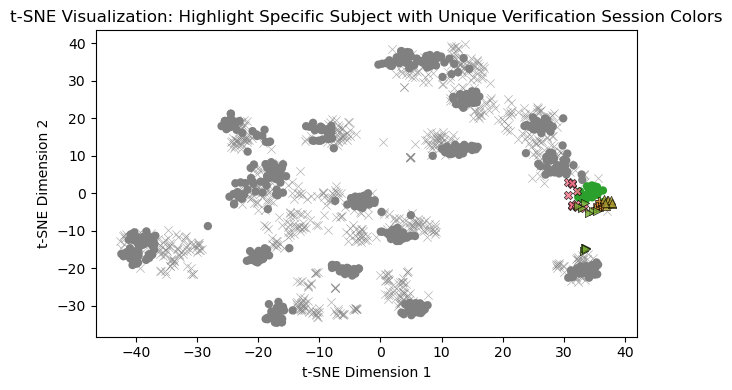

In [80]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgb
import seaborn as sns

# Define the subject to highlight
subject_to_highlight = 325  # Replace with the label of the subject to highlight

# Figure size
plt.figure(figsize=(6.3, 4))

# Set a fixed gray color for all subjects except the highlighted one
gray_color = (0.5, 0.5, 0.5)  # RGB for gray

# Generate a color palette for the highlighted subject's verification sessions
highlight_palette = sns.color_palette('husl', n_colors=10)  # Generate a range of distinct colors

# Assign colors: gray for all except the highlighted subject
assigned_colors = {label: gray_color for label in np.unique(Y_combined)}
assigned_colors[subject_to_highlight] = assigned_colors2[subject_to_highlight]  # A distinct color for enrollment

# Define marker list and shuffle for variety
marker_list = ['s', 'D', 'P', 'X', '*', 'v', '^', '<', '>']
random.shuffle(marker_list)

# Plotting enrollment and verification points separately
for label in np.unique(Y_combined):
    # Enrollment data
    idx_enroll = (Y_combined == label) & (np.arange(len(Y_combined)) < split_idx)
    points_enroll = X_tsne_combined[idx_enroll]

    # Verification data
    idx_verify = (Y_combined == label) & (np.arange(len(Y_combined)) >= split_idx)
    points_verify = X_tsne_combined[idx_verify]

    # Get unique session identifiers for verification
    session_ids = np.unique(S_combined[idx_verify])

    # Plot enrollment points
    plt.scatter(points_enroll[:, 0], points_enroll[:, 1],
                label=f"Enrollment: {label}" if label == subject_to_highlight else None,
                color=assigned_colors[label],
                marker='o', alpha=1, edgecolors='none')

    # Assign unique colors for verification sessions of the highlighted subject
    if label == subject_to_highlight:
        for session_idx, session_id in enumerate(session_ids):
            session_points = points_verify[S_combined[idx_verify] == session_id]
            session_color = highlight_palette[session_idx % len(highlight_palette)]  # Cycle through highlight colors
            marker = marker_list[session_idx % len(marker_list)]  # Cycle through marker list
            plt.scatter(session_points[:, 0], session_points[:, 1],
                        label=f"Verification: {label} (Session {session_idx + 1})",
                        color=session_color, marker=marker,
                        alpha=0.8, edgecolors='k', linewidth=0.5)
    else:
        # Plot verification points for non-highlighted subjects
        plt.scatter(points_verify[:, 0], points_verify[:, 1],
                    color=gray_color, marker='x',
                    alpha=0.6, edgecolors='k', linewidth=0.5)

# Custom legend and plot adjustments
plt.title("t-SNE Visualization: Highlight Specific Subject with Unique Verification Session Colors")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.tight_layout()
plt.savefig('highlighted_subject_20.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_1325818/1891268090.py:62: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(points_verify[:, 0], points_verify[:, 1],


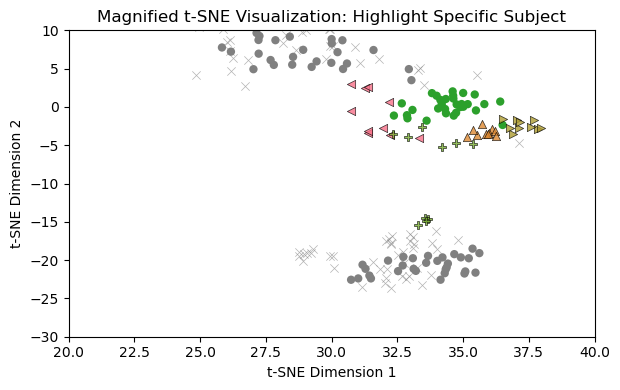

In [83]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgb
import seaborn as sns

# Define the subject to highlight
subject_to_highlight = 325  # Replace with the label of the subject to highlight

# Figure size
plt.figure(figsize=(6.3, 4))

# Set a fixed gray color for all subjects except the highlighted one
gray_color = (0.5, 0.5, 0.5)  # RGB for gray

# Generate a color palette for the highlighted subject's verification sessions
highlight_palette = sns.color_palette('husl', n_colors=10)  # Generate a range of distinct colors

# Assign colors: gray for all except the highlighted subject
assigned_colors = {label: gray_color for label in np.unique(Y_combined)}
assigned_colors[subject_to_highlight] = assigned_colors2[subject_to_highlight]  # A distinct color for enrollment

# Define marker list and shuffle for variety
marker_list = ['s', 'D', 'P', 'X', '*', 'v', '^', '<', '>']
random.shuffle(marker_list)

# To store the highlighted subject's data points for magnification
highlighted_points = []

# Plotting enrollment and verification points separately
for label in np.unique(Y_combined):
    # Enrollment data
    idx_enroll = (Y_combined == label) & (np.arange(len(Y_combined)) < split_idx)
    points_enroll = X_tsne_combined[idx_enroll]

    # Verification data
    idx_verify = (Y_combined == label) & (np.arange(len(Y_combined)) >= split_idx)
    points_verify = X_tsne_combined[idx_verify]

    # Get unique session identifiers for verification
    session_ids = np.unique(S_combined[idx_verify])

    # Plot enrollment points
    plt.scatter(points_enroll[:, 0], points_enroll[:, 1],
                label=f"Enrollment: {label}" if label == subject_to_highlight else None,
                color=assigned_colors[label],
                marker='o', alpha=1, edgecolors='none')

    # Assign unique colors for verification sessions of the highlighted subject
    if label == subject_to_highlight:
        for session_idx, session_id in enumerate(session_ids):
            session_points = points_verify[S_combined[idx_verify] == session_id]
            highlighted_points.append(session_points)  # Save points for magnification
            session_color = highlight_palette[session_idx % len(highlight_palette)]  # Cycle through highlight colors
            marker = marker_list[session_idx % len(marker_list)]  # Cycle through marker list
            plt.scatter(session_points[:, 0], session_points[:, 1],
                        label=f"Verification: {label} (Session {session_idx + 1})",
                        color=session_color, marker=marker,
                        alpha=0.8, edgecolors='k', linewidth=0.5)
    else:
        # Plot verification points for non-highlighted subjects
        plt.scatter(points_verify[:, 0], points_verify[:, 1],
                    color=gray_color, marker='x',
                    alpha=0.6, edgecolors='k', linewidth=0.5)

# Calculate the bounding box for the highlighted subject's data
highlighted_points = np.vstack(highlighted_points)  # Combine all points into one array
x_min, x_max = highlighted_points[:, 0].min(), highlighted_points[:, 0].max()
y_min, y_max = highlighted_points[:, 1].min(), highlighted_points[:, 1].max()

# Apply magnification by setting x and y limits
plt.xlim(20, 40)
plt.ylim(-30, 10)

# Custom legend and plot adjustments
plt.title("Magnified t-SNE Visualization: Highlight Specific Subject")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.tight_layout()
plt.savefig('highlighted_subject_magnified.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
